In [1]:
#Cars4U.py
#Author: Kyle Larson & Solange A.
#license: These scripts and data are for the use of Solange A. in her 
#datascience course.
#Project for Analyzing Used Cars Dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(30,18)})
used_cars_data=pd.read_csv("used_cars_data.csv")

In [2]:
used_cars_data.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [3]:
used_cars_data.describe()

,S.No.,Year,Kilometers_Driven,Seats,Price
count,7253.000000,7253.000000,7.253000e+03,7200.000000,6019.000000
mean,3626.000000,2013.365366,5.869906e+04,5.279722,9.479468
std,2093.905084,3.254421,8.442772e+04,0.811660,11.187917
min,0.000000,1996.000000,1.710000e+02,0.000000,0.440000
25%,1813.000000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3626.000000,2014.000000,5.341600e+04,5.000000,5.640000
75%,5439.000000,2016.000000,7.300000e+04,5.000000,9.950000
max,7252.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [4]:
#Look at the mileage on that car! 6.5 million km is 4.03891 million miles
#print("Max mileage (km):")
#print(used_cars_data['Kilometers_Driven'].max())
#print('\n')
#maxmiles=used_cars_data['Kilometers_Driven'].idxmax()
#print(used_cars_data.iloc[maxmiles])

In [5]:
#Outlier Cutoffs
#It is more useful to visualize and generate regresion from KM_Driven that does not contain outliers
quantitative=['S.No.','Year','Kilometers_Driven','Seats','Price']
seventy_fifth=[5439.000000,2016.000000,7.300000e+04,5.000000,9.950000]
twenty_fifth=[1813.000000,2011.000000,3.400000e+04,5.000000,3.500000]
cutoffs, upperco, lowerco =[],[],[]
for i in range(len(seventy_fifth)): cutoffs.append( (seventy_fifth[i] - twenty_fifth[i])*1.5 ) 
for i in range(len(seventy_fifth)): upperco.append( seventy_fifth[i] + cutoffs[i] ) 
for i in range(len(seventy_fifth)): lowerco.append( twenty_fifth[i] - cutoffs[i] ) 

print("Outliers fall below:")

print(lowerco)
print("Outliers extend above:")
print(upperco)

print(quantitative)
#you will see that though it doesn't make sense to cal outlier by S.No 
#outliers exist for Year, Kilometers Driven, Seats and Price 

Outliers fall below:
[-3626.0, 2003.5, -24500.0, 5.0, -6.174999999999999]
Outliers extend above:
[10878.0, 2023.5, 131500.0, 5.0, 19.625]
['S.No.', 'Year', 'Kilometers_Driven', 'Seats', 'Price']


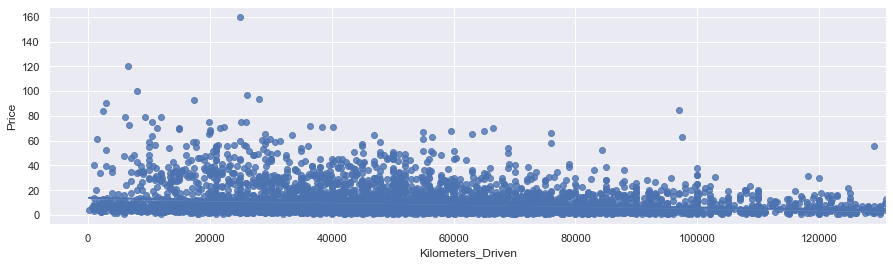

In [6]:
#getting rid of the outliers:

outliers, used_cars_minus_outliers  = [x for _, x in used_cars_data.groupby(used_cars_data['Kilometers_Driven'] < 131500)]

#plotting:
plt.figure(figsize=(15,4))
sns.regplot(data=used_cars_minus_outliers, x="Kilometers_Driven", y="Price")
# it seems that it would be appropriate to apply a relatonship to all cars under 131500 
# for the reason that the rest are outliers

[Text(0, 0, '1996'),
 Text(0, 0, '1998'),
 Text(0, 0, '1999'),
 Text(0, 0, '2000'),
 Text(0, 0, '2001'),
 Text(0, 0, '2002'),
 Text(0, 0, '2003'),
 Text(0, 0, '2004'),
 Text(0, 0, '2005'),
 Text(0, 0, '2006'),
 Text(0, 0, '2007'),
 Text(0, 0, '2008'),
 Text(0, 0, '2009'),
 Text(0, 0, '2010'),
 Text(0, 0, '2011'),
 Text(0, 0, '2012'),
 Text(0, 0, '2013'),
 Text(0, 0, '2014'),
 Text(0, 0, '2015'),
 Text(0, 0, '2016'),
 Text(0, 0, '2017'),
 Text(0, 0, '2018'),
 Text(0, 0, '2019')]

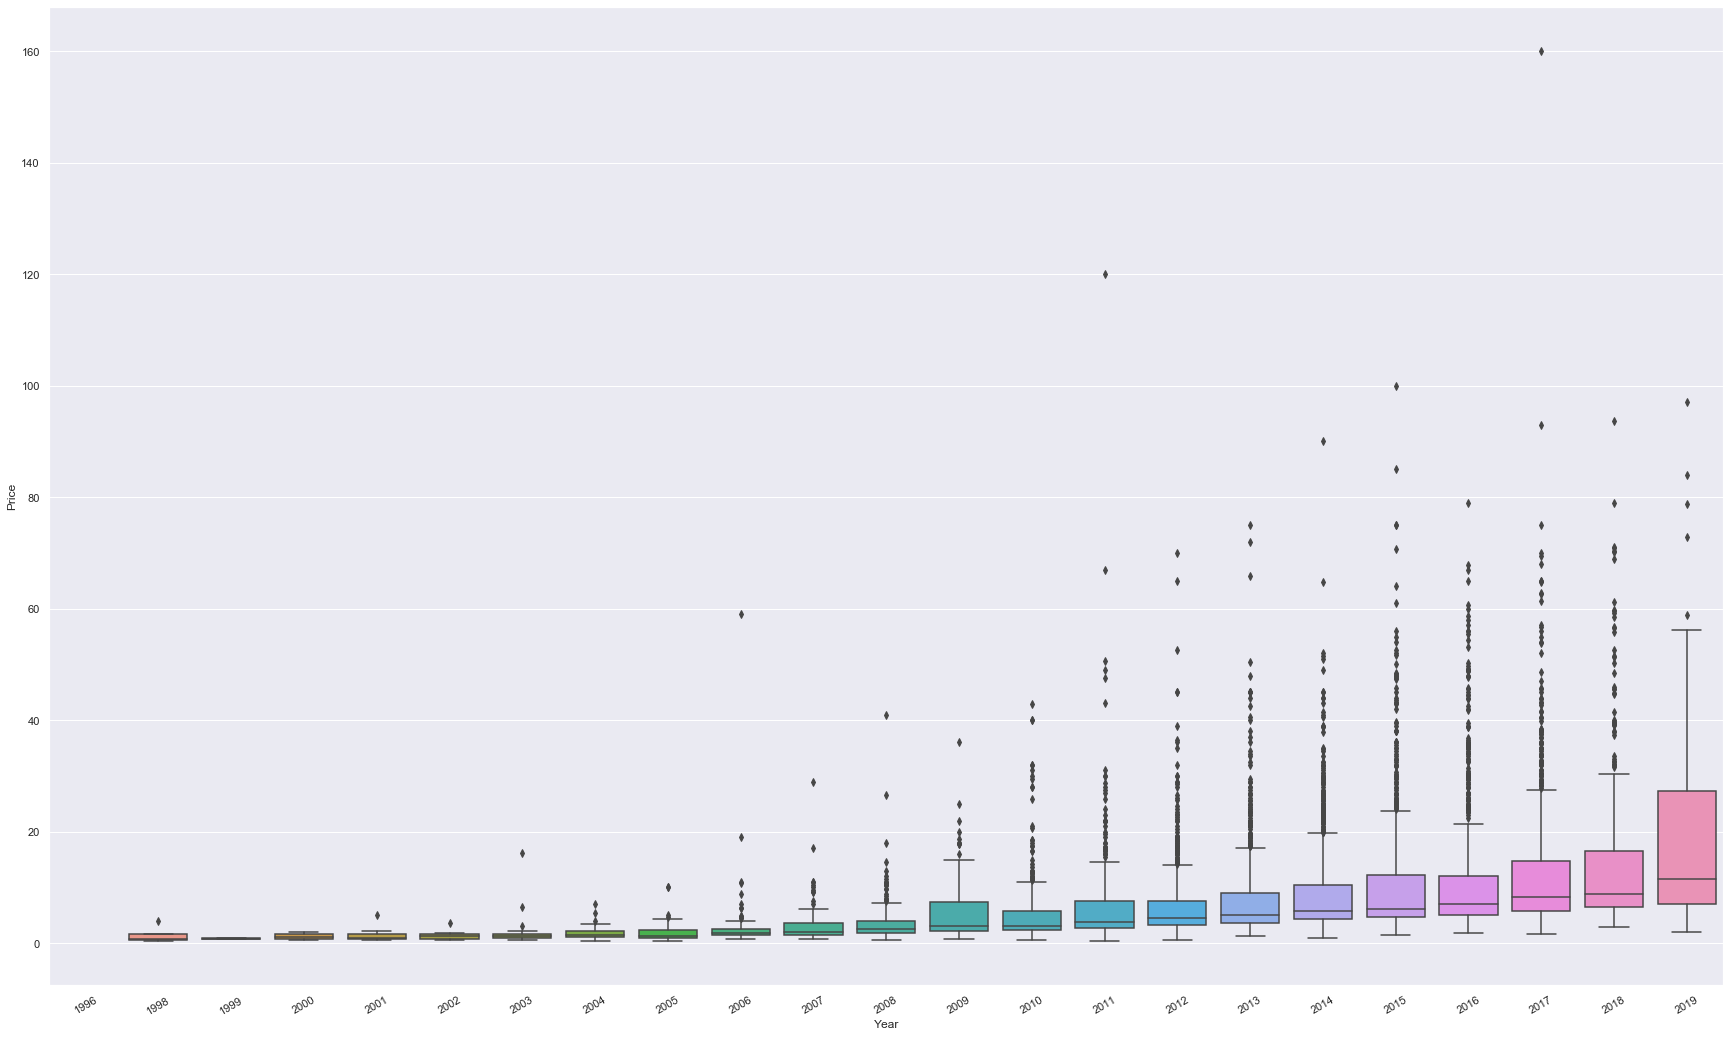

In [7]:
#Year vs Price
ax = sns.boxplot(x="Year", 
            y="Price", 
            data=used_cars_data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

In [8]:
#Process By Manufacturer

first_word = lambda s: s.split()[0]

copy_used_cars_data = used_cars_data.copy()

copy_used_cars_data['Name'] = copy_used_cars_data['Name'].apply(first_word)

[Text(0, 0, 'Maruti'),
 Text(0, 0, 'Hyundai'),
 Text(0, 0, 'Honda'),
 Text(0, 0, 'Audi'),
 Text(0, 0, 'Nissan'),
 Text(0, 0, 'Toyota'),
 Text(0, 0, 'Volkswagen'),
 Text(0, 0, 'Tata'),
 Text(0, 0, 'Land'),
 Text(0, 0, 'Mitsubishi'),
 Text(0, 0, 'Renault'),
 Text(0, 0, 'Mercedes-Benz'),
 Text(0, 0, 'BMW'),
 Text(0, 0, 'Mahindra'),
 Text(0, 0, 'Ford'),
 Text(0, 0, 'Porsche'),
 Text(0, 0, 'Datsun'),
 Text(0, 0, 'Jaguar'),
 Text(0, 0, 'Volvo'),
 Text(0, 0, 'Chevrolet'),
 Text(0, 0, 'Skoda'),
 Text(0, 0, 'Mini'),
 Text(0, 0, 'Fiat'),
 Text(0, 0, 'Jeep'),
 Text(0, 0, 'Smart'),
 Text(0, 0, 'Ambassador'),
 Text(0, 0, 'Isuzu'),
 Text(0, 0, 'ISUZU'),
 Text(0, 0, 'Force'),
 Text(0, 0, 'Bentley'),
 Text(0, 0, 'Lamborghini'),
 Text(0, 0, 'Hindustan'),
 Text(0, 0, 'OpelCorsa')]

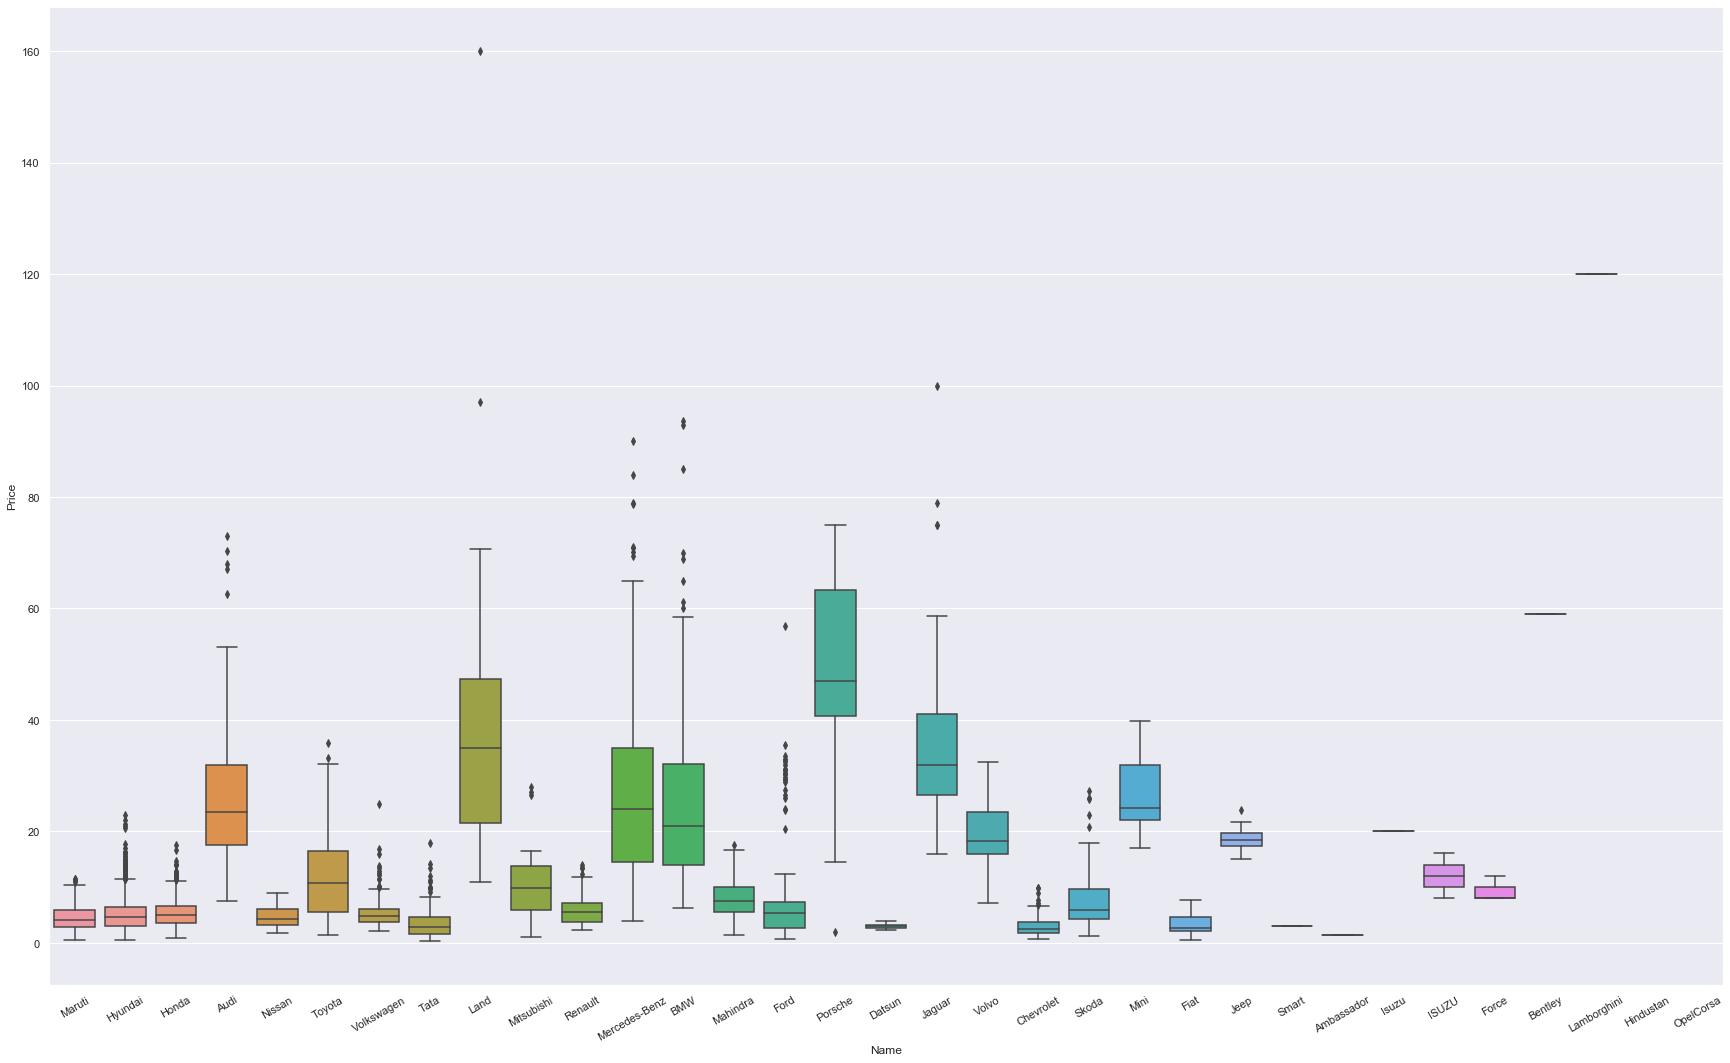

In [9]:
ax = sns.boxplot(x="Name", 
            y="Price", 
            data=copy_used_cars_data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

[Text(0, 0, 'Mumbai'),
 Text(0, 0, 'Pune'),
 Text(0, 0, 'Chennai'),
 Text(0, 0, 'Coimbatore'),
 Text(0, 0, 'Hyderabad'),
 Text(0, 0, 'Jaipur'),
 Text(0, 0, 'Kochi'),
 Text(0, 0, 'Kolkata'),
 Text(0, 0, 'Delhi'),
 Text(0, 0, 'Bangalore'),
 Text(0, 0, 'Ahmedabad')]

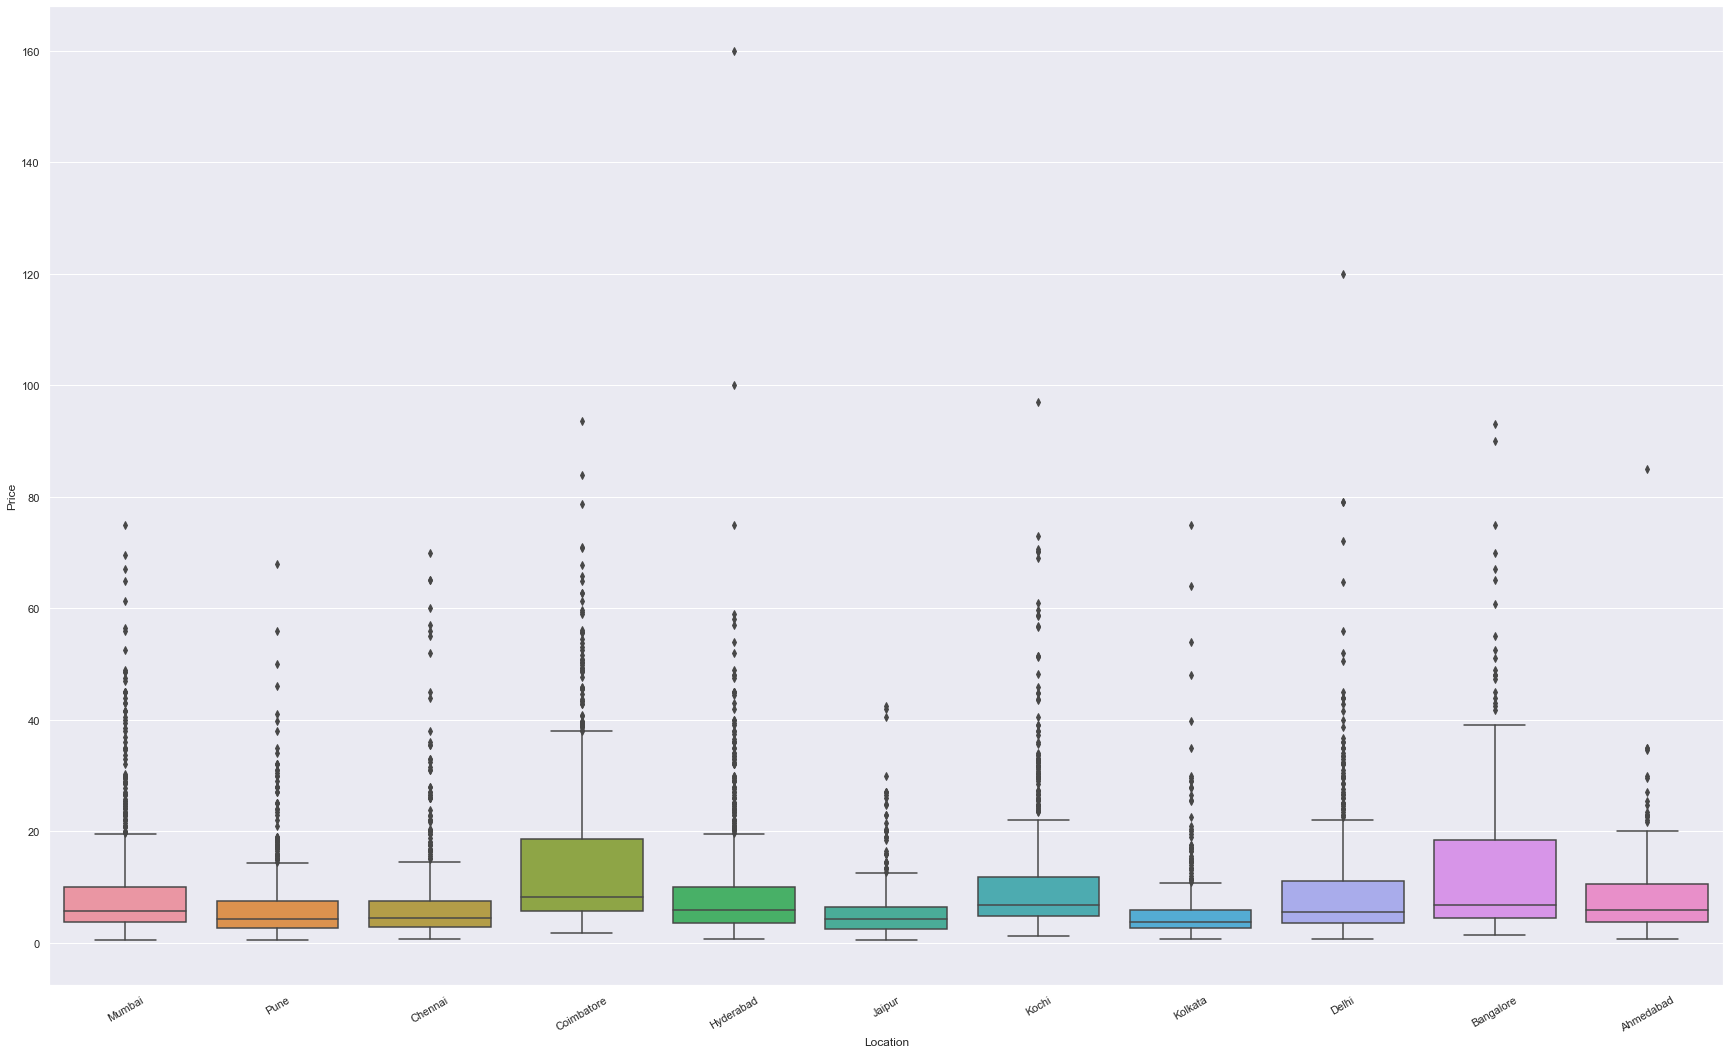

In [10]:
# by location
ax = sns.boxplot(x="Location", 
            y="Price", 
            data=copy_used_cars_data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

[Text(0, 0, 'CNG'),
 Text(0, 0, 'Diesel'),
 Text(0, 0, 'Petrol'),
 Text(0, 0, 'LPG'),
 Text(0, 0, 'Electric')]

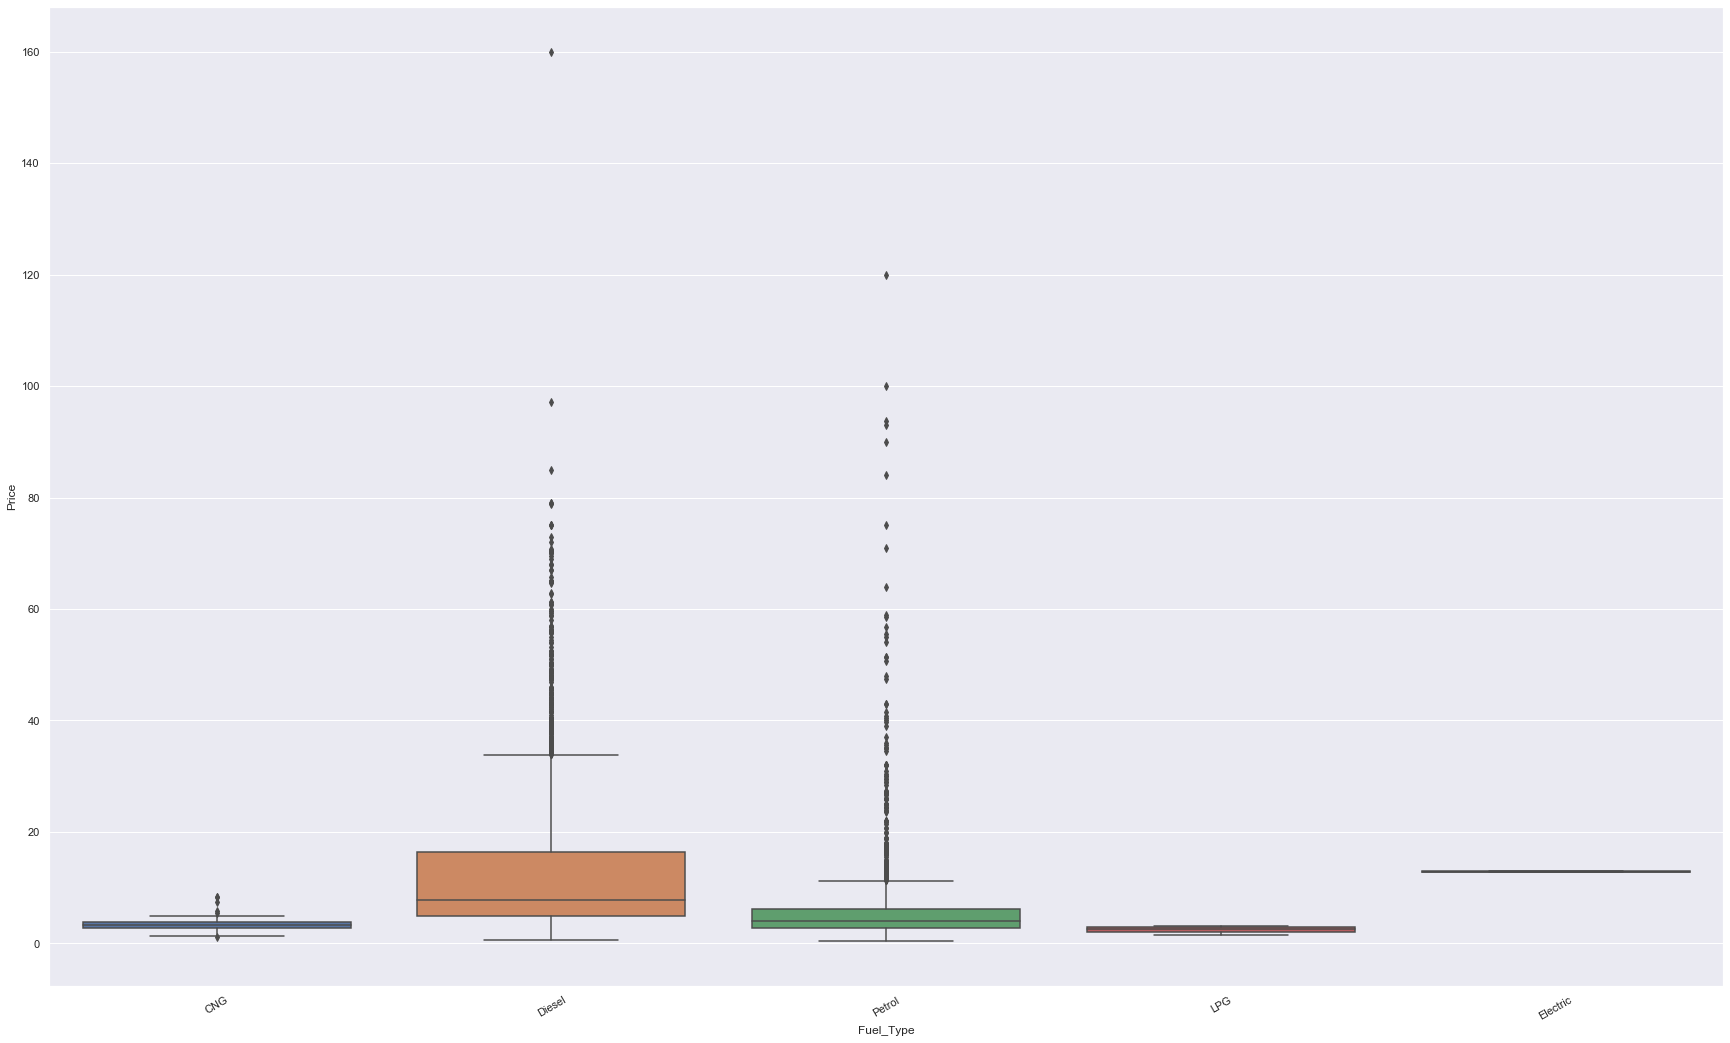

In [11]:
ax = sns.boxplot(x="Fuel_Type", 
            y="Price", 
            data=copy_used_cars_data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

[Text(0, 0, 'First'),
 Text(0, 0, 'Second'),
 Text(0, 0, 'Fourth & Above'),
 Text(0, 0, 'Third')]

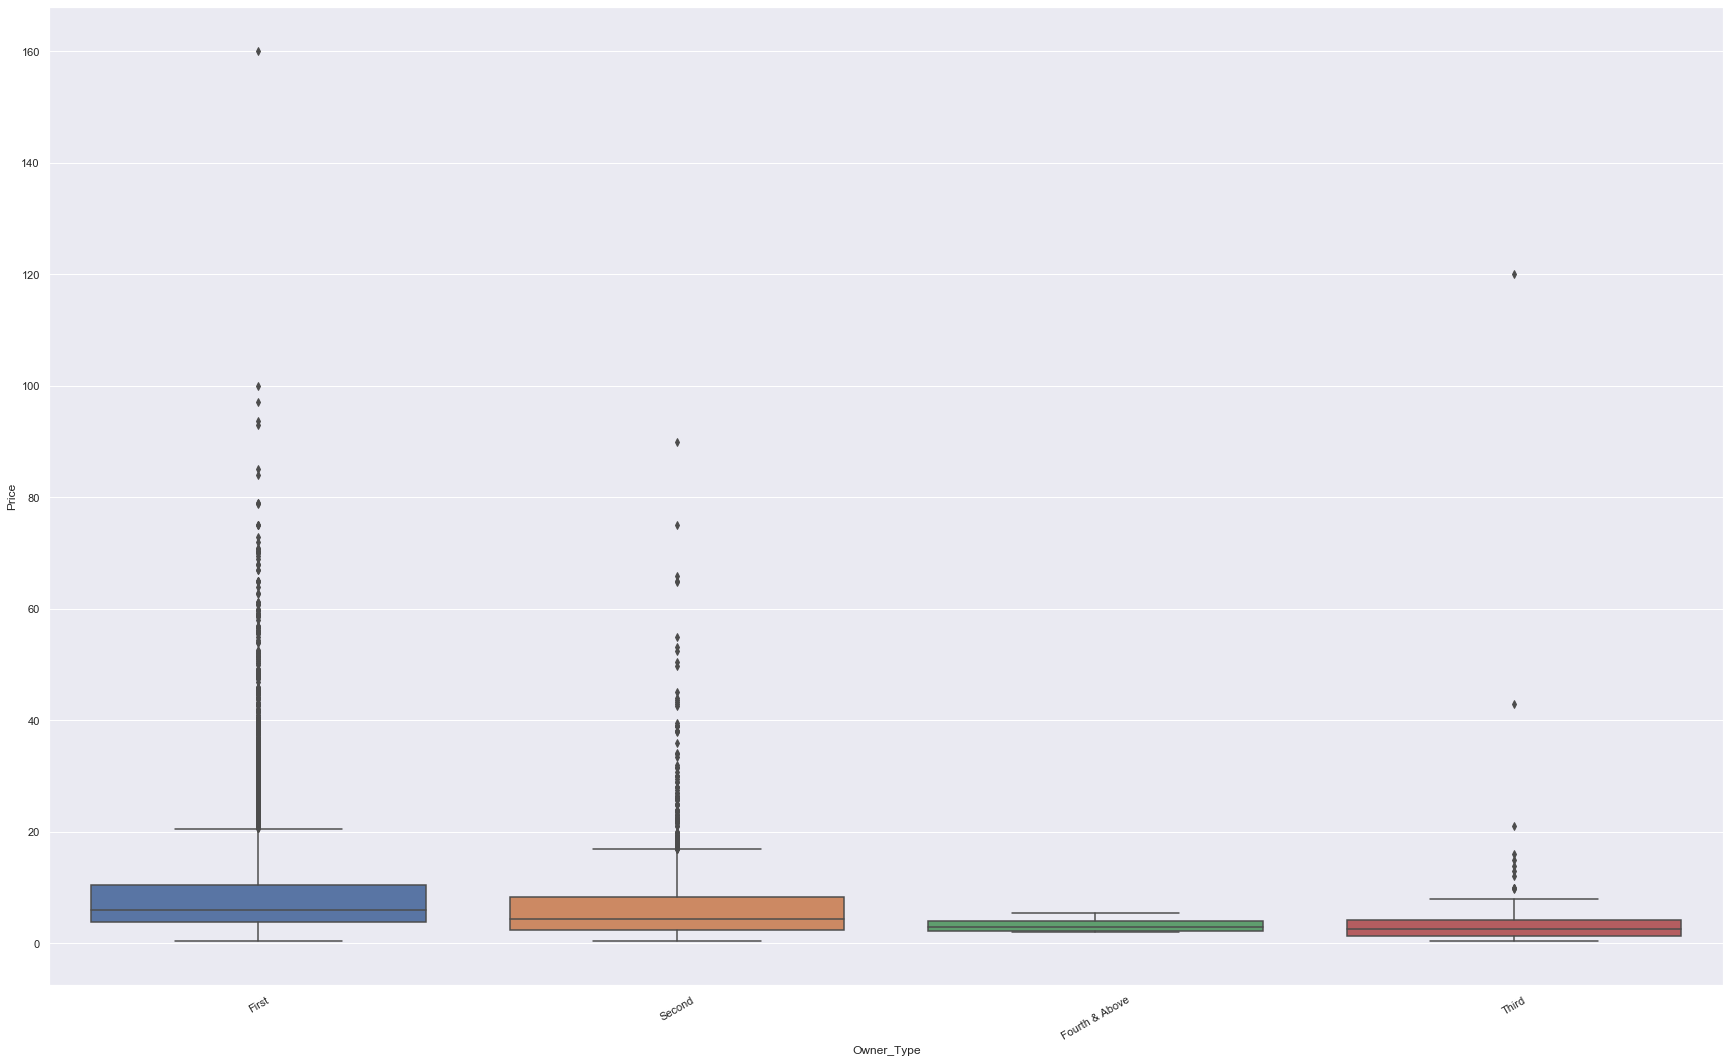

In [12]:
ax = sns.boxplot(x="Owner_Type", 
            y="Price", 
            data=copy_used_cars_data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

[Text(0, 0, 'Manual'), Text(0, 0, 'Automatic')]

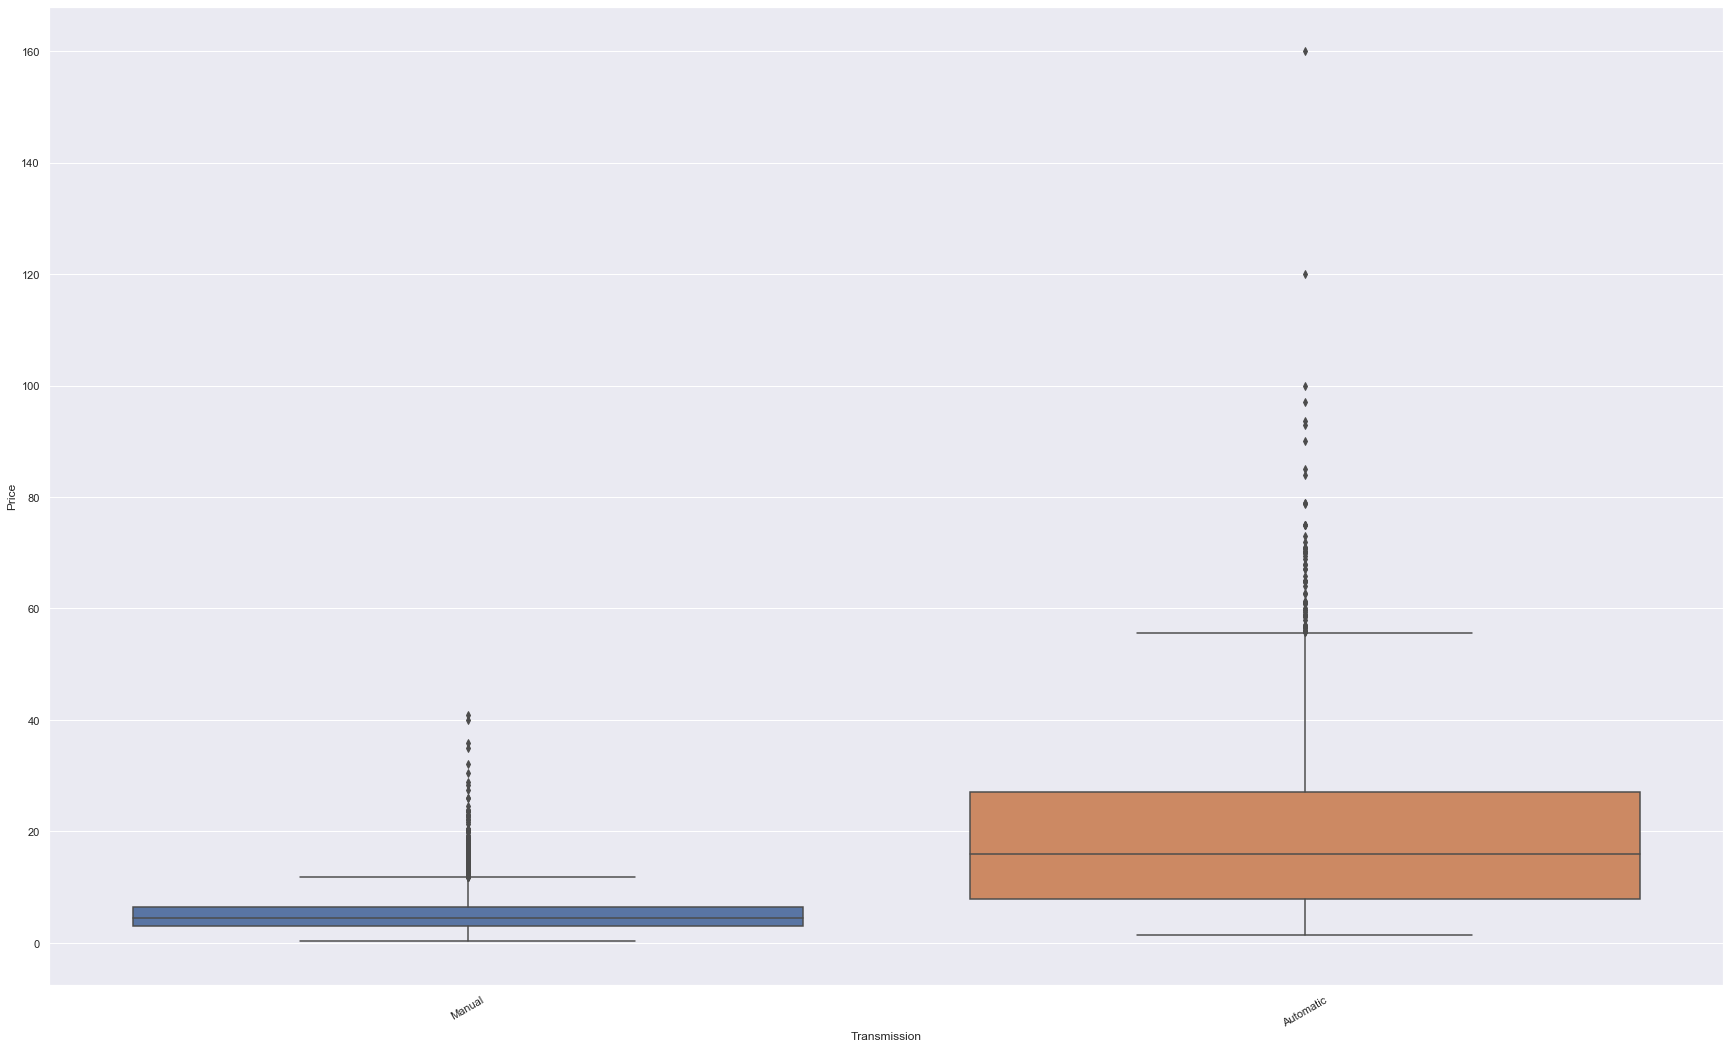

In [13]:
ax = sns.boxplot(x="Transmission", 
            y="Price", 
            data=copy_used_cars_data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

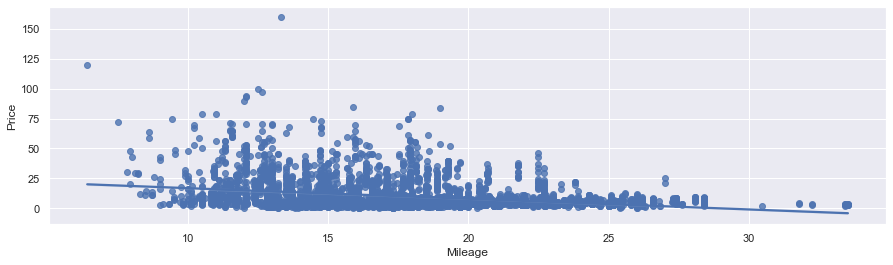

In [14]:
#Mileage vs Price
#this column will require intensive cleanup
mileage = copy_used_cars_data['Mileage']
copy_used_cars_data['Mileage'] = mileage.apply(str)
copy_used_cars_data['Mileage'] = mileage.apply(lambda f: float(first_word(f)))
nonzero_Mileage = (pd.DataFrame(copy_used_cars_data['Mileage']) != 0).any(axis=1)
copy_used_cars_data = copy_used_cars_data.loc[nonzero_Mileage]
plt.figure(figsize=(15,4))
sns.regplot(data=copy_used_cars_data, x="Mileage", y="Price")
#there is very little relationship here

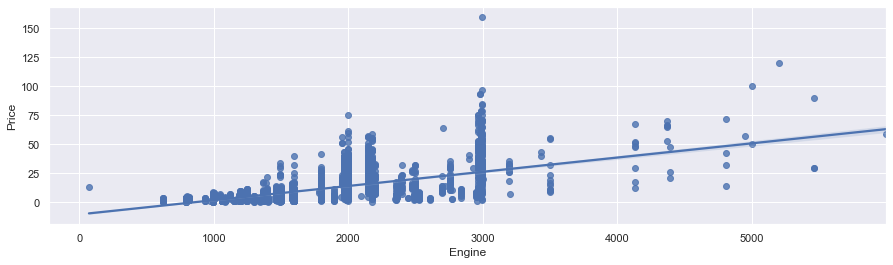

In [15]:
#Engine vs Price
#this column will require intensive cleanup
engine = copy_used_cars_data['Engine']
copy_used_cars_data['Engine'] = engine.apply(str)
copy_used_cars_data['Engine'] = engine.apply(lambda f: float(first_word(f)))
plt.figure(figsize=(15,4))
sns.regplot(data=copy_used_cars_data, x="Engine", y="Price")

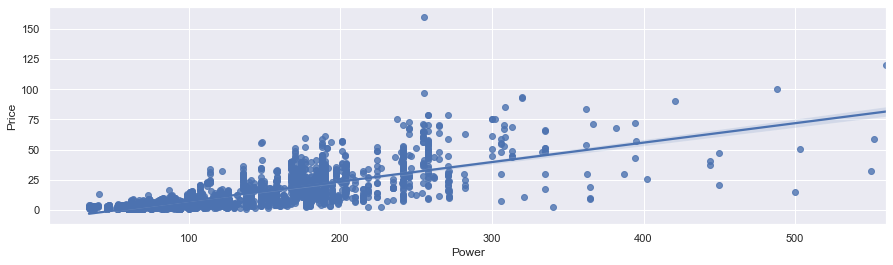

In [16]:
#Power vs Price
def num_there(s):#https://stackoverflow.com/questions/19859282/check-if-a-string-contains-a-number
    return any(i.isdigit() for i in s)
def float_please(f): 
    if(num_there(f)): 
        return float(f)
    return 0
power = copy_used_cars_data['Power']
copy_used_cars_data['Power'] = power.apply(str)
copy_used_cars_data['Power'] = power.apply(lambda F: float_please(first_word(F)))
nonzero_power = (pd.DataFrame(copy_used_cars_data['Power']) != 0).any(axis=1)
copy_used_cars_data = copy_used_cars_data.loc[nonzero_power]
plt.figure(figsize=(15,4))
sns.regplot(data=copy_used_cars_data, x="Power", y="Price")

In [17]:
power_price = copy_used_cars_data.drop(copy_used_cars_data.columns[0:10], axis=1)
power_price = power_price.drop(copy_used_cars_data.columns[11:13], axis=1)
power_price.head()
#power_price.describe()

,Power,Price
0,58.16,1.75
1,126.20,12.50
2,88.70,4.50
3,88.76,6.00
4,140.80,17.74


[Text(0, 0, '2.0'),
 Text(0, 0, '4.0'),
 Text(0, 0, '5.0'),
 Text(0, 0, '6.0'),
 Text(0, 0, '7.0'),
 Text(0, 0, '8.0'),
 Text(0, 0, '9.0'),
 Text(0, 0, '10.0')]

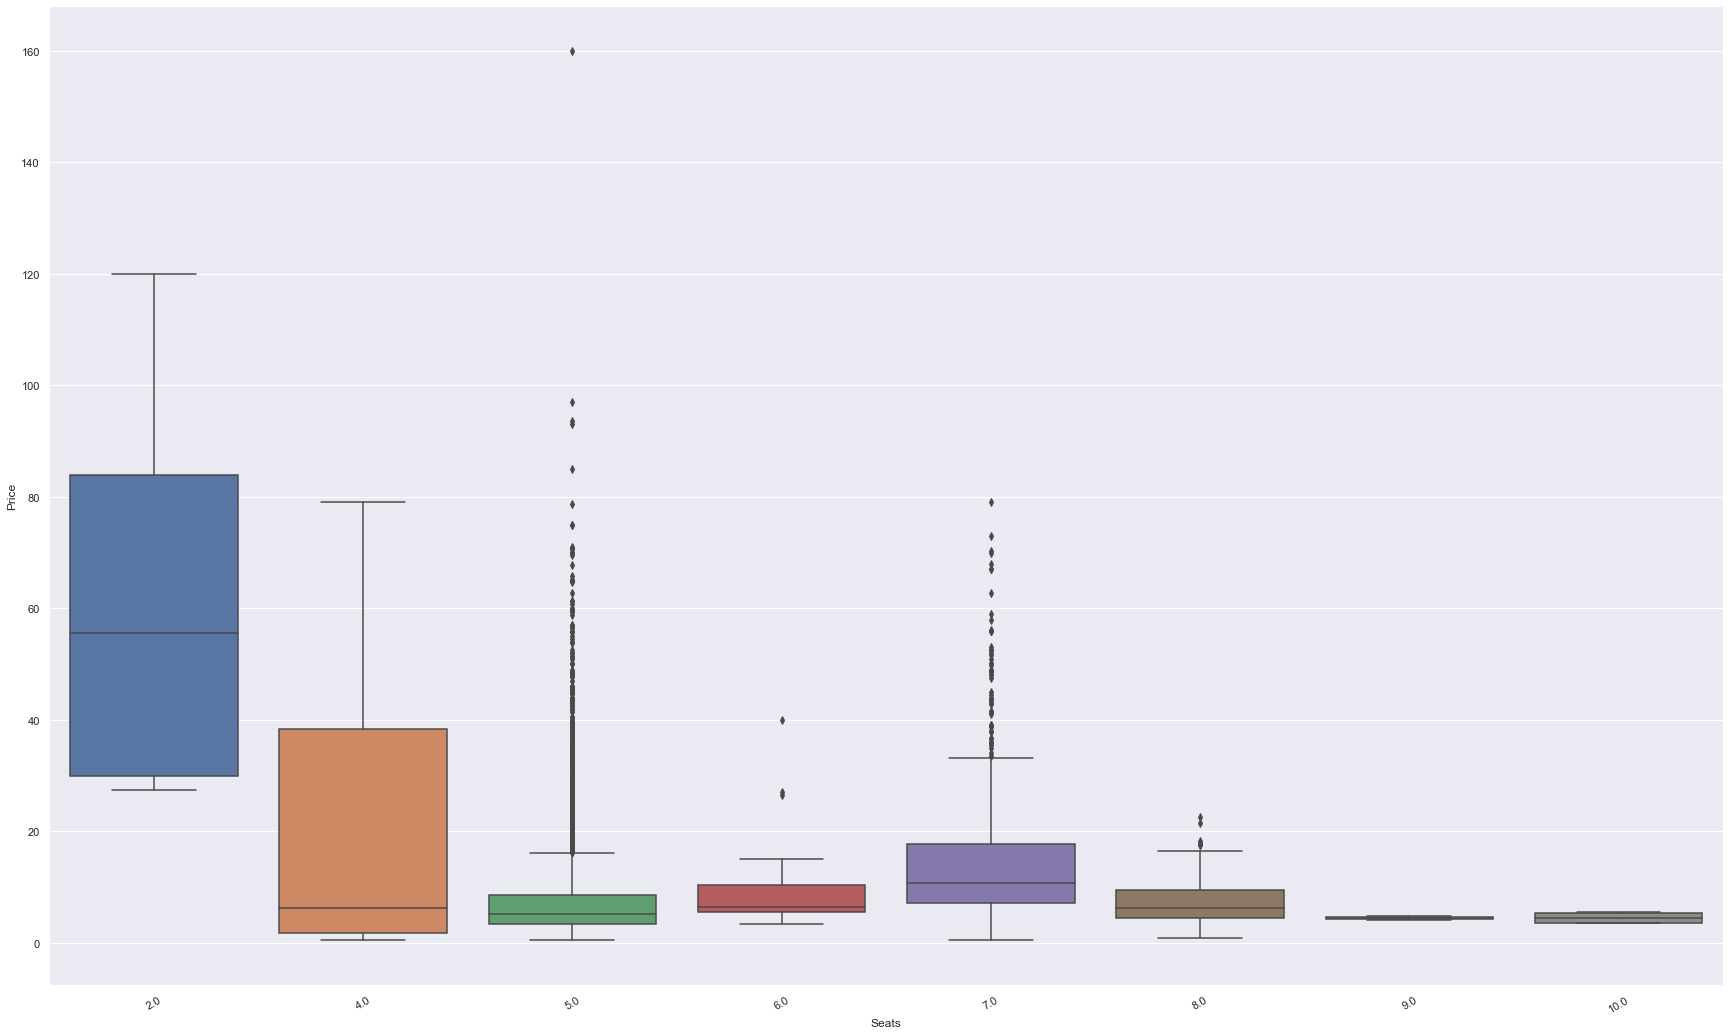

In [18]:
#Seats vs Price
ax = sns.boxplot(x="Seats", 
            y="Price", 
            data=copy_used_cars_data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

In [19]:
#Use only the points that have price data
import numpy as np
nonzero_Price = copy_used_cars_data['Price'].apply(lambda n: not np.isnan(n))
copy_used_cars_data = copy_used_cars_data.loc[nonzero_Price]

In [20]:
print(copy_used_cars_data.describe())

             S.No.         Year  Kilometers_Driven      Mileage       Engine  \
count  5847.000000  5847.000000       5.847000e+03  5845.000000  5847.000000   
mean   3013.347358  2013.479562       5.832816e+04    18.364494  1622.577048   
std    1736.119158     3.165016       9.233245e+04     4.188510   599.186083   
min       0.000000  1998.000000       1.710000e+02     6.400000    72.000000   
25%    1513.500000  2012.000000       3.349800e+04    15.300000  1198.000000   
50%    3014.000000  2014.000000       5.255300e+04    18.330000  1495.000000   
75%    4514.500000  2016.000000       7.241800e+04    21.100000  1984.000000   
max    6018.000000  2019.000000       6.500000e+06    33.540000  5998.000000   

             Power        Seats        Price  
count  5847.000000  5846.000000  5847.000000  
mean    113.118161     5.284981     9.545312  
std      53.809505     0.806647    11.184908  
min      34.200000     2.000000     0.440000  
25%      75.000000     5.000000     3.515000

In [21]:
copy_used_cars_data.iloc[2433] # coherency check

S.No.                      2510
Name                        BMW
Location                 Mumbai
Year                       2014
Kilometers_Driven         18600
Fuel_Type                Diesel
Transmission          Automatic
Owner_Type               Second
Mileage                   22.69
Engine                     1995
Power                       190
Seats                         5
New_Price            54.43 Lakh
Price                        21
Name: 2510, dtype: object

In [22]:
from sklearn.model_selection import train_test_split
y = copy_used_cars_data["Price"]
X = copy_used_cars_data.drop(["Location", "New_Price", "Price"], axis=1)
X_train, X_val, y_train, y_val= train_test_split(X, y,random_state = 0)

In [23]:
X_train.describe()

,S.No.,Year,Kilometers_Driven,Mileage,Engine,Power,Seats
count,4385.000000,4385.000000,4.385000e+03,4383.000000,4385.000000,4385.000000,4384.000000
mean,3009.382668,2013.491904,5.878415e+04,18.402941,1621.024857,112.915244,5.281478
std,1737.518264,3.127534,1.046199e+05,4.222288,593.916742,53.285654,0.806184
min,0.000000,1998.000000,1.710000e+02,6.400000,72.000000,34.200000,2.000000
25%,1508.000000,2012.000000,3.400000e+04,15.300000,1198.000000,75.000000,5.000000
50%,3003.000000,2014.000000,5.295100e+04,18.490000,1496.000000,97.700000,5.000000
75%,4517.000000,2016.000000,7.200000e+04,21.110000,1984.000000,138.100000,5.000000
max,6018.000000,2019.000000,6.500000e+06,33.540000,5461.000000,560.000000,10.000000


In [24]:
y_train.describe()

count    4385.000000
mean        9.459808
std        10.969801
min         0.450000
25%         3.550000
50%         5.750000
75%         9.960000
max       160.000000
Name: Price, dtype: float64

In [25]:
print(y_train.iloc[248])
print(X_train.iloc[248]) #coherency check

21.0
S.No.                     2510
Name                       BMW
Year                      2014
Kilometers_Driven        18600
Fuel_Type               Diesel
Transmission         Automatic
Owner_Type              Second
Mileage                  22.69
Engine                    1995
Power                      190
Seats                        5
Name: 2510, dtype: object


In [26]:
# Get list of categorical variables
#https://www.kaggle.com/alexisbcook/categorical-variables
s = (X_train.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['Name', 'Fuel_Type', 'Transmission', 'Owner_Type']


In [27]:
X_train.describe()

,S.No.,Year,Kilometers_Driven,Mileage,Engine,Power,Seats
count,4385.000000,4385.000000,4.385000e+03,4383.000000,4385.000000,4385.000000,4384.000000
mean,3009.382668,2013.491904,5.878415e+04,18.402941,1621.024857,112.915244,5.281478
std,1737.518264,3.127534,1.046199e+05,4.222288,593.916742,53.285654,0.806184
min,0.000000,1998.000000,1.710000e+02,6.400000,72.000000,34.200000,2.000000
25%,1508.000000,2012.000000,3.400000e+04,15.300000,1198.000000,75.000000,5.000000
50%,3003.000000,2014.000000,5.295100e+04,18.490000,1496.000000,97.700000,5.000000
75%,4517.000000,2016.000000,7.200000e+04,21.110000,1984.000000,138.100000,5.000000
max,6018.000000,2019.000000,6.500000e+06,33.540000,5461.000000,560.000000,10.000000


In [28]:
y_train.describe() #why are there different counts?

count    4385.000000
mean        9.459808
std        10.969801
min         0.450000
25%         3.550000
50%         5.750000
75%         9.960000
max       160.000000
Name: Price, dtype: float64

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Function for comparing different approaches
#def score_dataset(X_train, X_valid, y_train, y_valid):
#    model = RandomForestRegressor(n_estimators=100, random_state=0)
#    model.fit(X_train, y_train)
#    preds = model.predict(X_valid)
#    return mean_absolute_error(y_valid, preds)

In [30]:
from sklearn.preprocessing import OneHotEncoder

# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[object_cols]))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(X_val[object_cols]))

# One-hot encoding removed index; put it back
OH_cols_train.index = X_train.index
OH_cols_valid.index = X_val.index

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = X_train.drop(object_cols, axis=1)
num_X_valid = X_val.drop(object_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_valid = pd.concat([num_X_valid, OH_cols_valid], axis=1)

In [31]:
drop_X_train = X_train.select_dtypes(exclude=['object'])
drop_X_val = X_val.select_dtypes(exclude=['object'])
from sklearn.impute import SimpleImputer

# Imputation
my_imputer = SimpleImputer()
imputed_X_train = pd.DataFrame(my_imputer.fit_transform(drop_X_train))
imputed_X_val = pd.DataFrame(my_imputer.transform(drop_X_val))

# Imputation removed column names; put them back
imputed_X_train.columns = drop_X_train.columns
imputed_X_val.columns = drop_X_val.columns

In [32]:
print("MAE from Approach 1 (Drop categorical variables):")
imp_drop_model = RandomForestRegressor(n_estimators=100, random_state=0)
imp_drop_model.fit(imputed_X_train, y_train)
imp_drop_preds = imp_drop_model.predict(imputed_X_val)
MAE_imp_drop=mean_absolute_error(y_val, imp_drop_preds)
print(MAE_imp_drop) #<-struggling here with contamination still

MAE from Approach 1 (Drop categorical variables):
1.7433813269493843


In [33]:
# The MAE is the Mean Absolute Error = Average of absolute value of (actual - predicted)
# So this method yeilds predictions which are off by an average of about 1.7433 INR Lakhs

In [34]:
from sklearn.impute import SimpleImputer

# Imputation
my_imputer = SimpleImputer()
imputed_OH_X_train = pd.DataFrame(my_imputer.fit_transform(OH_X_train))
imputed_OH_X_valid = pd.DataFrame(my_imputer.transform(OH_X_valid))

# Imputation removed column names; put them back
imputed_OH_X_train.columns = OH_X_train.columns
imputed_OH_X_valid.columns = OH_X_valid.columns

In [35]:
print("MAE from Approach 3 (One-Hot Encoding):") 
imp_OH_model = RandomForestRegressor(n_estimators=100, random_state=0)
imp_OH_model.fit(imputed_OH_X_train, y_train)
imp_OH_preds = imp_OH_model.predict(imputed_OH_X_valid)
MAE_imp_OH = mean_absolute_error(y_val, imp_OH_preds)
print(MAE_imp_OH)

MAE from Approach 3 (One-Hot Encoding):
1.6553109439124485


In [36]:
# The MAE is the Mean Absolute Error = Average of absolute value of (actual - predicted)
# So this method yeilds predictions which are off by an average of about 1.6553 INR Lakhs

In [37]:
imputed_OH_X_train.describe()

,S.No.,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,0,1,2,...,30,31,32,33,34,35,36,37,38,39
count,4385.000000,4385.000000,4.385000e+03,4385.000000,4385.000000,4385.000000,4385.000000,4385.000000,4385.000000,4385.000000,...,4385.000000,4385.000000,4385.000000,4385.000000,4385.000000,4385.000000,4385.000000,4385.000000,4385.000000,4385.000000
mean,3009.382668,2013.491904,5.878415e+04,18.402941,1621.024857,112.915244,5.281478,0.000228,0.037400,0.045382,...,0.538198,0.000456,0.002052,0.449943,0.288483,0.711517,0.823261,0.000684,0.158039,0.018016
std,1737.518264,3.127534,1.046199e+05,4.221325,593.916742,53.285654,0.806092,0.015101,0.189762,0.208164,...,0.498596,0.021354,0.045263,0.497545,0.453109,0.453109,0.381491,0.026150,0.364819,0.133024
min,0.000000,1998.000000,1.710000e+02,6.400000,72.000000,34.200000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1508.000000,2012.000000,3.400000e+04,15.300000,1198.000000,75.000000,5.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,3003.000000,2014.000000,5.295100e+04,18.480000,1496.000000,97.700000,5.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,4517.000000,2016.000000,7.200000e+04,21.100000,1984.000000,138.100000,5.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,6018.000000,2019.000000,6.500000e+06,33.540000,5461.000000,560.000000,10.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [38]:
#references: 
#https://www.kaggle.com/alexisbcook/missing-values
#https://www.kaggle.com/alexisbcook/categorical-variables
#https://www.kaggle.com/learn/intermediate-machine-learning
#

In [39]:
print(imp_drop_preds)
print(len(imp_drop_preds))

[ 2.1184 12.3481  8.3054 ... 10.8907 11.3495 10.4648]
1462


In [40]:
print(imp_OH_preds)
print(len(imp_OH_preds))

[ 2.1712 12.6437  7.9224 ... 11.02   11.4796 11.0402]
1462


In [41]:
#standard deviation of the residuals for comparison
from statistics import stdev
print("Standard Deviation of the Residuals of Approach 1:")
imp_drop_resid =np.subtract(imp_drop_preds, y_val)
stdev_resid_imp_drop = stdev(imp_drop_resid)
print(stdev_resid_imp_drop)
print("Standard Deviation of the Residuals of Approach 3:")
imp_OH_resid =np.subtract(imp_OH_preds, y_val)
stdev_resid_imp_OH = stdev(imp_OH_resid)
print(stdev_resid_imp_OH)

Standard Deviation of the Residuals of Approach 1:
4.0125267725677904
Standard Deviation of the Residuals of Approach 3:
3.6726159392794364


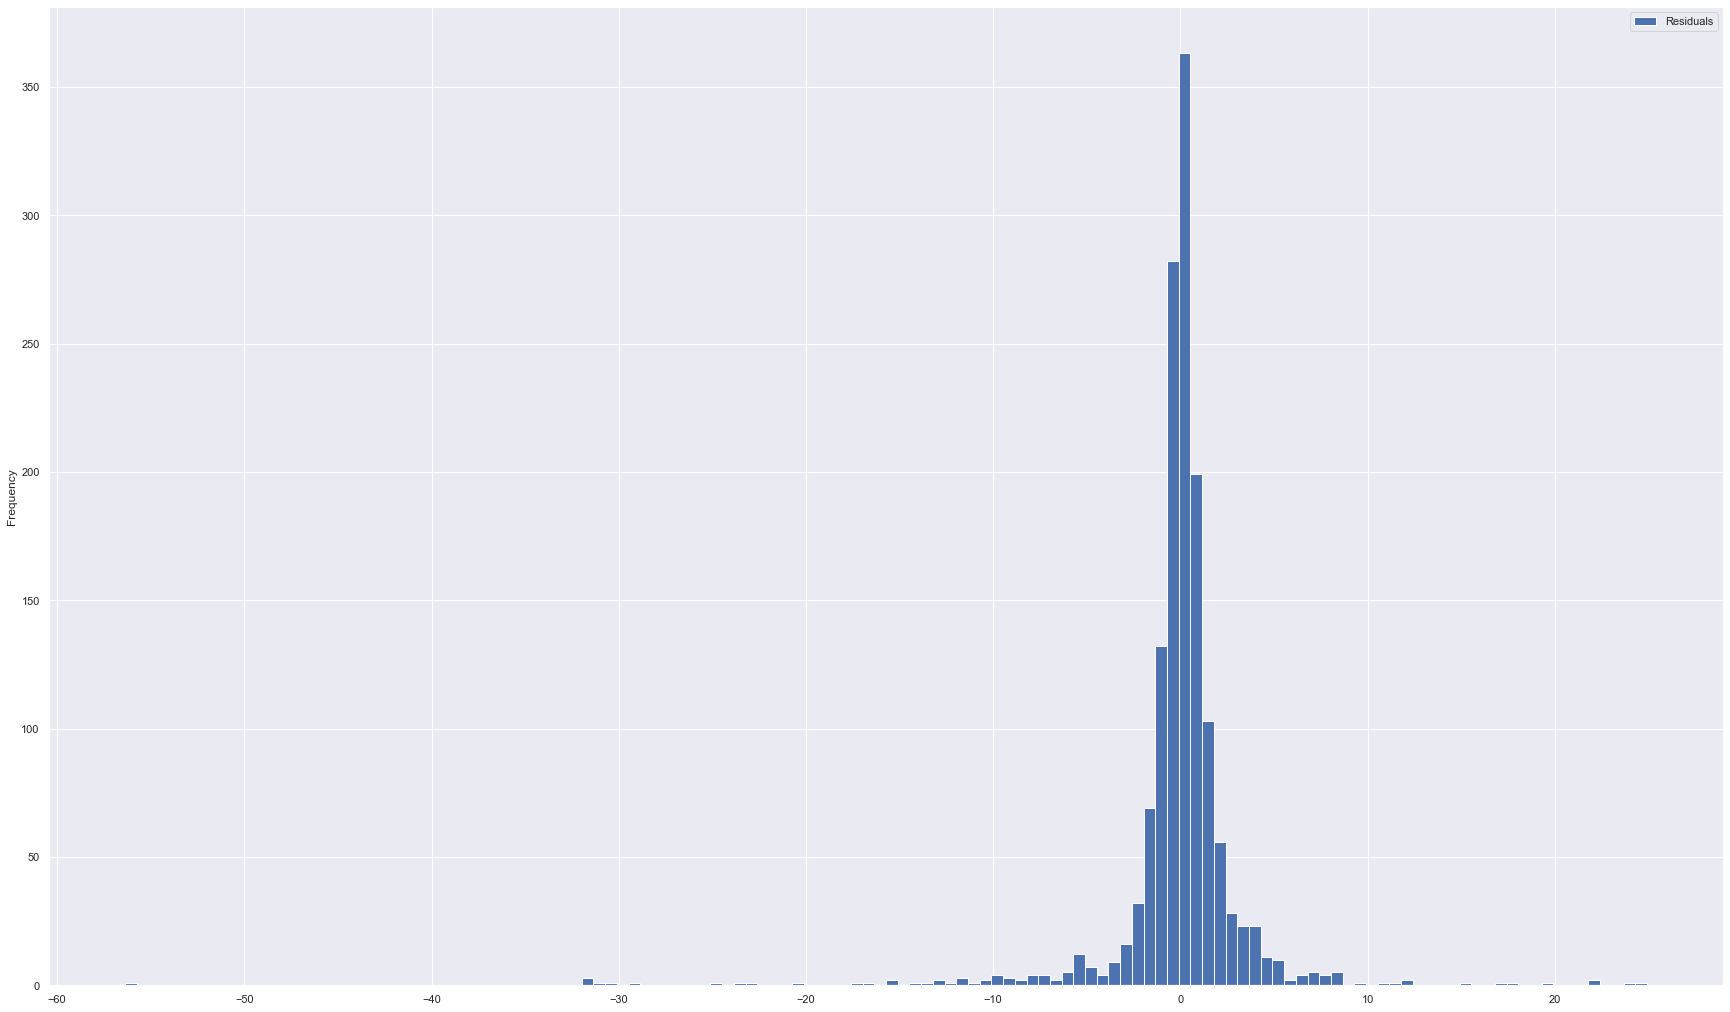

In [42]:
import matplotlib.pyplot as plt
imp_drop_resid_data = pd.DataFrame({"Residuals":imp_drop_resid})
imp_drop_resid_data.plot.hist(grid=True, bins=130)

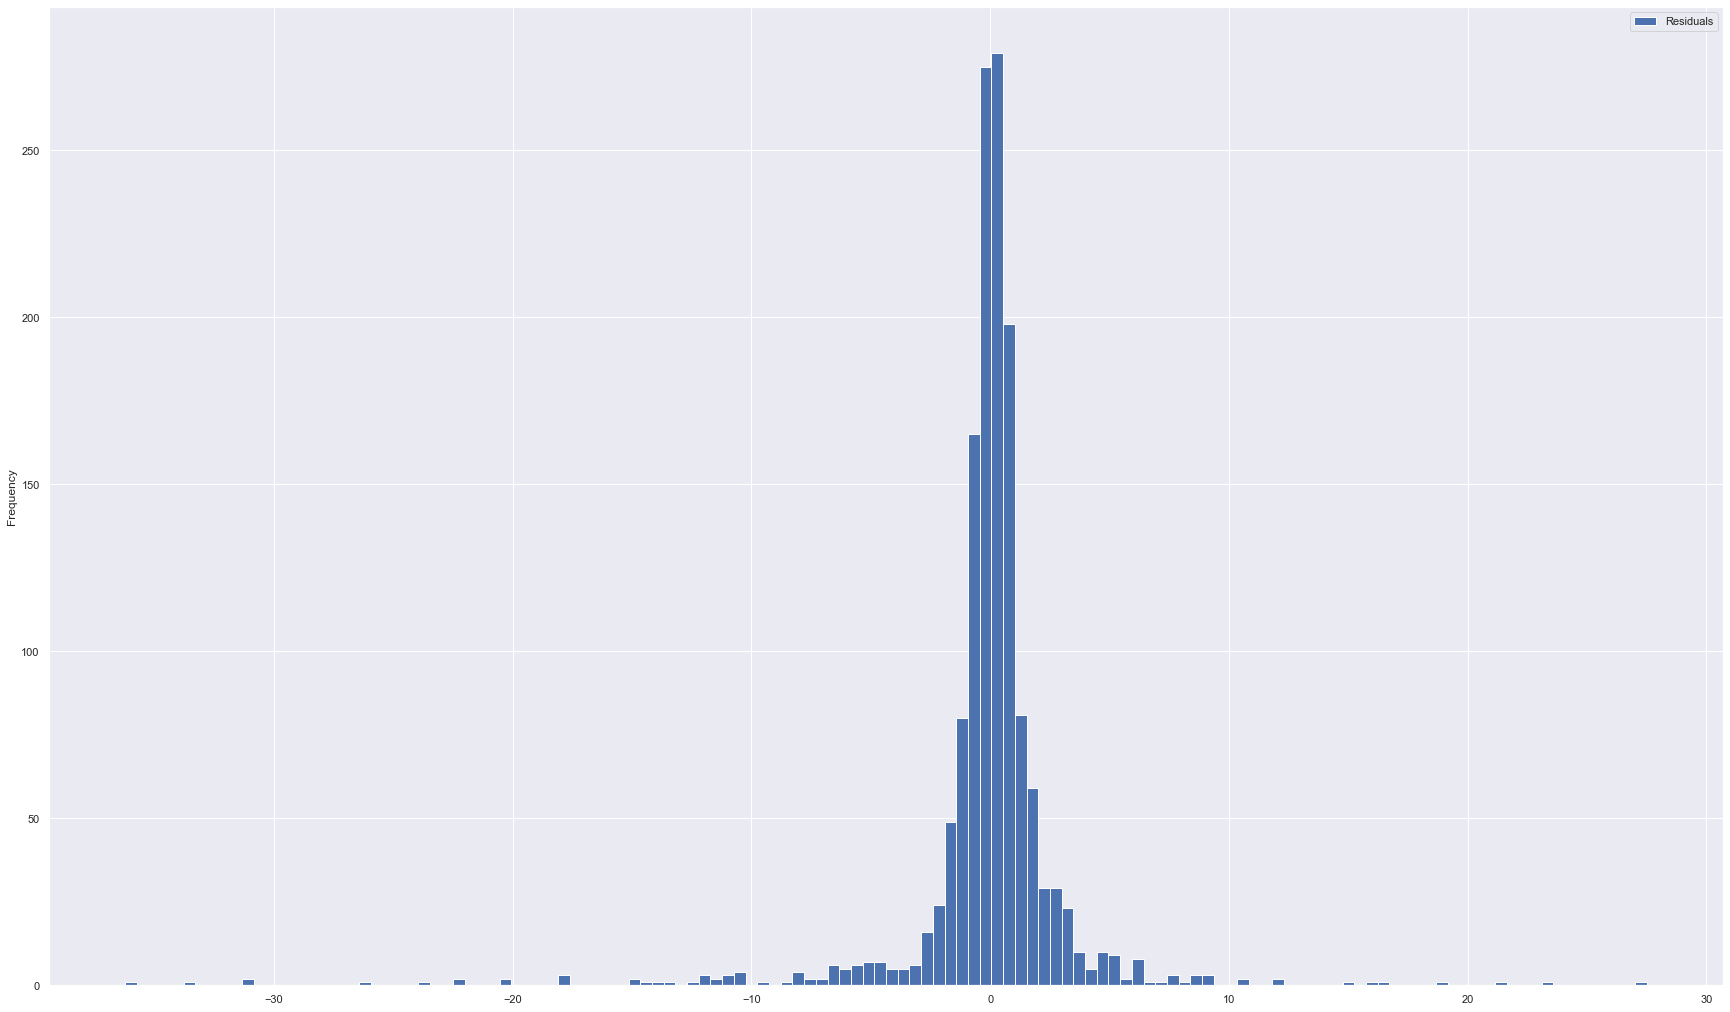

In [43]:
import matplotlib.pyplot as plt
imp_OH_resid_data = pd.DataFrame({"Residuals":imp_OH_resid})
imp_OH_resid_data.plot.hist(grid=True, bins=130)

In [44]:
X_train.describe()

,S.No.,Year,Kilometers_Driven,Mileage,Engine,Power,Seats
count,4385.000000,4385.000000,4.385000e+03,4383.000000,4385.000000,4385.000000,4384.000000
mean,3009.382668,2013.491904,5.878415e+04,18.402941,1621.024857,112.915244,5.281478
std,1737.518264,3.127534,1.046199e+05,4.222288,593.916742,53.285654,0.806184
min,0.000000,1998.000000,1.710000e+02,6.400000,72.000000,34.200000,2.000000
25%,1508.000000,2012.000000,3.400000e+04,15.300000,1198.000000,75.000000,5.000000
50%,3003.000000,2014.000000,5.295100e+04,18.490000,1496.000000,97.700000,5.000000
75%,4517.000000,2016.000000,7.200000e+04,21.110000,1984.000000,138.100000,5.000000
max,6018.000000,2019.000000,6.500000e+06,33.540000,5461.000000,560.000000,10.000000


In [45]:
X_val.describe()

,S.No.,Year,Kilometers_Driven,Mileage,Engine,Power,Seats
count,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000
mean,3025.238714,2013.442544,56960.500000,18.249234,1627.232558,113.726775,5.295486
std,1732.455140,3.275683,35592.552288,4.084822,614.902987,55.365099,0.808218
min,1.000000,1998.000000,1000.000000,8.000000,624.000000,34.200000,2.000000
25%,1548.250000,2012.000000,32318.000000,15.292500,1197.000000,74.000000,5.000000
50%,3053.000000,2014.000000,52000.000000,18.160000,1493.000000,93.850000,5.000000
75%,4504.750000,2016.000000,73910.250000,21.100000,1968.000000,140.000000,5.000000
max,6017.000000,2019.000000,480000.000000,33.540000,5998.000000,552.000000,9.000000


In [46]:
y_train.describe()

count    4385.000000
mean        9.459808
std        10.969801
min         0.450000
25%         3.550000
50%         5.750000
75%         9.960000
max       160.000000
Name: Price, dtype: float64

In [47]:
 y_val.describe()

count    1462.000000
mean        9.801765
std        11.806788
min         0.440000
25%         3.500000
50%         5.650000
75%        10.317500
max        97.070000
Name: Price, dtype: float64

In [48]:
# Created Simple Linear Model
from sklearn import linear_model
lin_reg_model = linear_model.LinearRegression()
frames_X = [imputed_OH_X_train, imputed_OH_X_valid]
frames_y = [y_train, y_val]
result_X = pd.concat(frames_X)
result_y = pd.concat(frames_y)
#Fit the model
lin_reg_model.fit(result_X, result_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
#Validate the Simple Linear Prediction Model
predicted_prices_lin = lin_reg_model.predict(result_X)

In [50]:
#Checking that we have predictions
print(predicted_prices_lin)

[ 6.53965946 28.9470596  23.8967153  ... 10.2916713  11.53694147
 13.32292867]


In [51]:
print("MAE from linear reg model (One-Hot Encoding):") 
MAE_lin_reg = mean_absolute_error(result_y, predicted_prices_lin)
print(MAE_lin_reg)

MAE from linear reg model (One-Hot Encoding):
2.9422029725184236


In [52]:
#this 2.94 is worse by far than the Machine Learning model:1.65531
#this simple linear model has less risk of overfitting the data

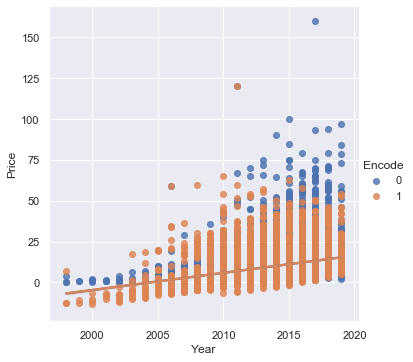

In [53]:
# simple linear model Year vs Price with the actual data values

#stack the actual on the predictions
result_y_list = list(result_y[:])
result_y_list.extend(predicted_prices_lin)

#create one column to distinguish putting it in the hue
double_x_result_list = list(result_X["Year"])
double_x_result_list.extend(double_x_result_list)
encode = [0]*int(11694/2)
encode.extend([1]*int(11694/2))
year_pred_actual = pd.DataFrame({"Year":double_x_result_list, "Price":result_y_list, "Encode":encode})

#plot
#1 encoding represents the predicted prices from the linear model
sns.lmplot(x="Year", y="Price", hue="Encode", data=year_pred_actual)